In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
docentes = {
    'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Presencial': [288203, 300204, 305945, 309900, 323840, 330312, 329708, 327810, 328715, 326582, 310478, 302439, 303044, 303368],
    'EaD': [8491, 9587, 10055, 11510, 12891, 13223, 13701, 15982, 18543, 20452, 21864, 24046, 28663, 32794]
}

In [3]:
df_docentes = pd.DataFrame(docentes)

In [4]:
# Calcular o total de docentes por ano e atribuir os resultados a uma nova coluna:
df_docentes['Total_Docentes'] = df_docentes['Presencial'] + df_docentes['EaD']

In [5]:
# Dereter o dataframe em um novo.
df_long = df_docentes.melt(id_vars='Ano', value_vars=['Presencial', 'EaD'], var_name='Modalidade', value_name='Numero_Docentes')

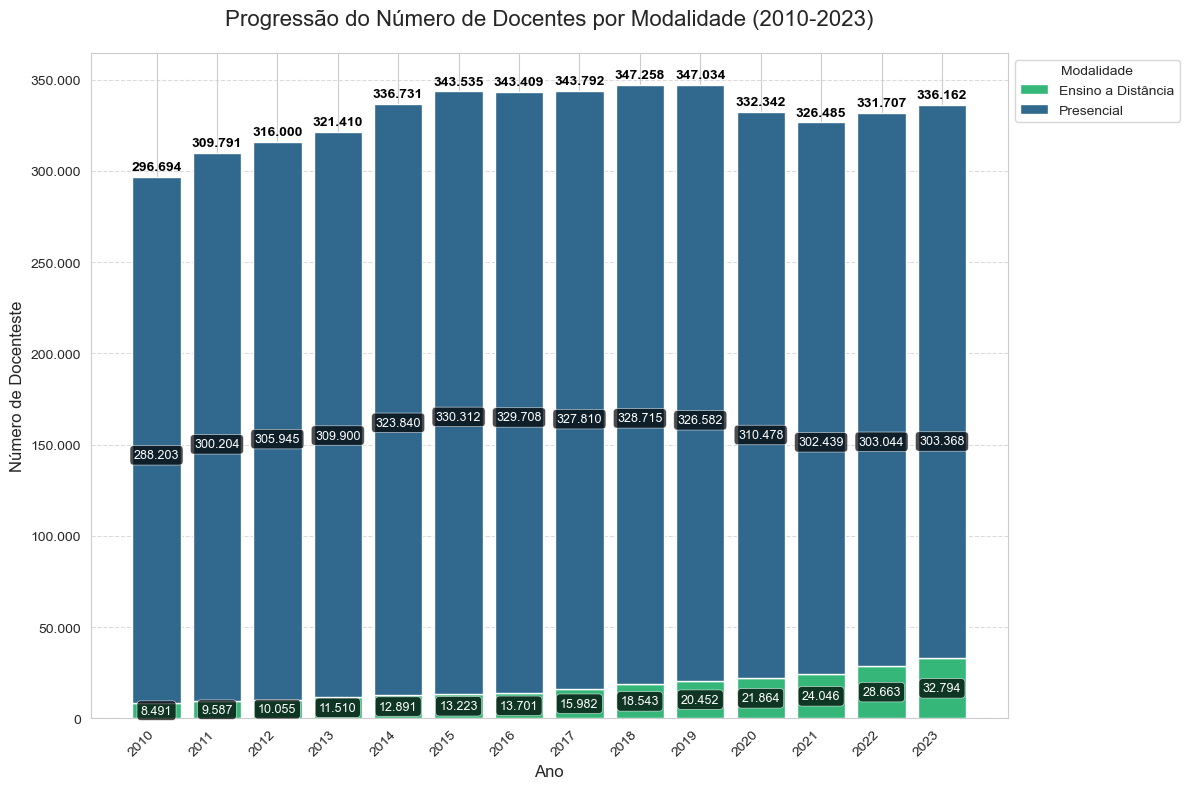

In [39]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

color = sns.color_palette('viridis', 2)
#bars1 = plt.bar(df_docentes['Ano'], df_docentes['EaD'], label='Ensino a Distância', color='#6A5ACD')
bars1 = plt.bar(df_docentes['Ano'], df_docentes['EaD'], label='Ensino a Distância', color=color[1])

#bars2 = plt.bar(df_docentes['Ano'], df_docentes['Presencial'], bottom=df_docentes['EaD'], label='Presencial', color='#FF8C00')
bars2 = plt.bar(df_docentes['Ano'], df_docentes['Presencial'], bottom=df_docentes['EaD'], label='Presencial', color=color[0])

for i, ano in enumerate(df_docentes['Ano']):
    plt.text(ano, df_docentes['Presencial'][i] / 2,
             f"{df_docentes['Presencial'][i]:,}".replace(',', '.'),
             ha='center', va='center', color='white', fontsize=9,
             bbox=dict(boxstyle="round, pad=0.3", fc='black', ec='white', lw=0.5, alpha=0.7))

    plt.text(ano, df_docentes['EaD'][i] / 2,
            f"{df_docentes['EaD'][i]:,}".replace(',', '.'),
            ha='center', va='center', color='white', fontsize=9,
            bbox=dict(boxstyle="round, pad=0.3", fc='black', ec='white', lw=0.5, alpha=0.7))

    plt.text(ano, df_docentes['Total_Docentes'][i] + 2000,
            f"{df_docentes['Total_Docentes'][i]:,}".replace(',', '.'),
            ha='center', va='bottom', color='black', fontsize=10,
            fontweight='bold')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}".replace(',','.')))

plt.title('Progressão do Número de Docentes por Modalidade (2010-2023)', fontsize=16, pad= 20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Docenteste', fontsize=12)
plt.xticks(df_docentes['Ano'], rotation=45, ha='right') # Rotação para os anos
plt.yticks(fontsize=10) # Tamanho da fonte dos rótulos do eixo y
plt.legend(title='Modalidade', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid apenas no eixo y

plt.tight_layout()
plt.savefig('Progressão_Docentes_por_modalidade.png', dpi=300, bbox_inches='tight')
plt.show()

(Figura 4 - Docentes atuantes na graduação em 2023)

In [8]:
# Obter os dados de 2023
dados_2023 = df_docentes[df_docentes['Ano'] == 2023].iloc[0]
presencial_2023 = dados_2023['Presencial']
ead_2023 = dados_2023['EaD']
total_2023 = presencial_2023 + ead_2023 

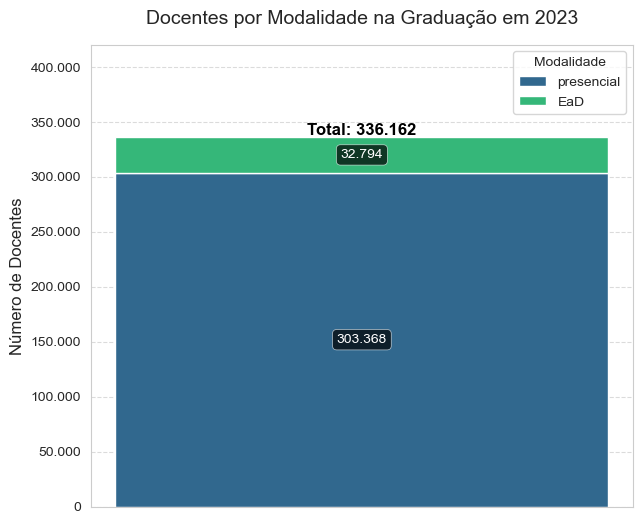

In [32]:
plt.figure(figsize=(7,6))
sns.set_style("whitegrid")

color = sns.color_palette('viridis', 2)

# bar_presencial = plt.bar('2023', presencial_2023, label='presencial', color='#D55E00')
bar_presencial = plt.bar('2023', presencial_2023, label='presencial', color=color[0])

#bar_ead = plt.bar('2023', ead_2023, bottom=presencial_2023, label='EaD', color='#0072B2')
bar_ead = plt.bar('2023', ead_2023, bottom=presencial_2023, label='EaD', color=color[1])

plt.text('2023', presencial_2023 / 2,
         f"{presencial_2023:,}".replace(',', '.'),
         ha='center', va="center", color='white', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", fc='black', ec='white', lw=0.5, alpha=0.7))

plt.text('2023', presencial_2023 + ead_2023 / 2,
         f"{ead_2023:,}".replace(',', '.'),
         ha='center', va='center', color='white', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", fc='black', ec='white', lw=0.5, alpha=0.7))

plt.text('2023', total_2023 + 6000,
         f"Total: {total_2023:,}".replace(',', '.'),
         ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}".replace(',', '.')))

plt.title('Docentes por Modalidade na Graduação em 2023', fontsize=14, pad=15)
plt.ylabel('Número de Docentes', fontsize=12)
plt.xticks([]) # Remove os ticks do x pois só a uma categoria.
plt.yticks(fontsize=10)
plt.ylim(0, total_2023 * 1.25) # Ajuste do limete do eixo y.
plt.legend(title='Modalidade', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Figura_4.png', dpi=300, bbox_inches='tight')

(Figura 5 - Distribuição de docentes por titulação entre os cursos de graduação presenciais e a distância)

In [10]:
import locale
import matplotlib.ticker as mticker

In [11]:
Titulacao = {
    'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'd_doc_p': [82612, 91460, 98605, 103970, 113669, 121972, 130313, 137433, 145233, 150507, 151644, 153759, 158421, 162462],
    'd_mes_p': [107215, 112969, 116925, 120636, 124281, 127725, 125895, 124531, 123622, 120734, 109747, 102647, 99852, 97629],
    'd_esp_p': [102554, 99804, 94304, 88847, 87469, 81883, 74963, 67376, 61349, 57141, 50763, 48004, 46615, 44908],
    'd_doc_d': [2468, 3022, 3303, 4212, 5289, 5592, 5976, 7054, 8290, 8523, 9100, 10518, 12073, 13421],
    'd_mes_e': [3424, 4171, 4502, 4986, 5416, 5633, 5725, 6749, 7940, 9163, 9904, 10330, 12410, 14353],
    'd_esp_e': [2610, 2402, 2255, 2317, 2192, 2005, 2011, 2183, 2335, 2786, 2888, 3251, 4251, 5089]
}

In [12]:
df_titulacao = pd.DataFrame(Titulacao)

In [13]:
# Criar um novo df apenas com os dados referente ao ano de 2023:
df_2023 = df_titulacao[df_titulacao['Ano'] == 2023].copy() # Usar o .copy() para evitar SettingWithCopyWorning 

In [14]:
# Renomeando as colunas para facilitar o entendimento:
df_2023 = df_2023.rename(columns={
    'd_doc_p': 'Doutorado_Presencial',
    'd_mes_p': 'Mestrado_Presencial',
    'd_esp_p': 'Especializacao_Presencial',
    'd_doc_d': 'Doutorado_EaD',
    'd_mes_e': 'Mestrado_EaD',
    'd_esp_e': 'Especializacao_EaD'
})

In [15]:
# Selecionando apenas as colunas de titulação:
df_2023_data = df_2023[['Doutorado_Presencial', 'Mestrado_Presencial',
       'Especializacao_Presencial', 'Doutorado_EaD', 'Mestrado_EaD',
       'Especializacao_EaD']]

In [16]:
# Transformando para o formato longo para usar o seaborn com .melt()
# Criando uma lista de dicionários para cada modalidade e titulação:
data_long = []
for col in df_2023_data.columns:
    titulacao, modalidade = col.split('_')
    data_long.append({
        'Titulação': titulacao.capitalize(), #Doutorado, Mestrado, Especiazacao
        'Modalidade': 'Presencial' if modalidade == 'Presencial' else 'EaD',
        'Numero_Docentes': df_2023_data[col].iloc[0]
    })

In [17]:
# Criado um df a partir da lista de dicionários data_long usando o método DataFrame() do pandas:
df_plot = pd.DataFrame(data_long)

In [18]:
# Calculando percentuais
# Total de docentes por Titulação (Presencial + EaD)
df_plot['Total_Titulacao'] = df_plot.groupby('Titulação')['Numero_Docentes'].transform('sum')
df_plot

,Titulação,Modalidade,Numero_Docentes,Total_Titulacao
0,Doutorado,Presencial,162462,175883
1,Mestrado,Presencial,97629,111982
2,Especializacao,Presencial,44908,49997
3,Doutorado,EaD,13421,175883
4,Mestrado,EaD,14353,111982
5,Especializacao,EaD,5089,49997


In [19]:
# Calculando o tatal de Docentes por modalidade:
total_presencial = df_plot[df_plot['Modalidade'] == 'Presencial']['Numero_Docentes'].sum()
total_presencial

304999

In [20]:
total_ead = df_plot[df_plot['Modalidade'] == 'EaD']['Numero_Docentes'].sum()
total_ead

32863

In [21]:
# Percentual da modalidade dentro daquela Titulação:
df_plot['Percentual_Dentro_Titulacao'] = df_plot['Numero_Docentes'] / df_plot['Total_Titulacao'] * 100
df_plot

,Titulação,Modalidade,Numero_Docentes,Total_Titulacao,Percentual_Dentro_Titulacao
0,Doutorado,Presencial,162462,175883,92.369359
1,Mestrado,Presencial,97629,111982,87.182762
2,Especializacao,Presencial,44908,49997,89.821389
3,Doutorado,EaD,13421,175883,7.630641
4,Mestrado,EaD,14353,111982,12.817238
5,Especializacao,EaD,5089,49997,10.178611


In [22]:
df_plot['Percentual_Dentro_Modalidade'] = df_plot.apply(lambda row: (row['Numero_Docentes'] / total_presencial * 100) if row['Modalidade'] == 'Presencial'
                                                        else (row['Numero_Docentes'] / total_ead * 100), axis=1)
df_plot
                

,Titulação,Modalidade,Numero_Docentes,Total_Titulacao,Percentual_Dentro_Titulacao,Percentual_Dentro_Modalidade
0,Doutorado,Presencial,162462,175883,92.369359,53.266404
1,Mestrado,Presencial,97629,111982,87.182762,32.009613
2,Especializacao,Presencial,44908,49997,89.821389,14.723983
3,Doutorado,EaD,13421,175883,7.630641,40.839242
4,Mestrado,EaD,14353,111982,12.817238,43.675258
5,Especializacao,EaD,5089,49997,10.178611,15.485500


In [23]:
# Definindo a ordem das titulações para o gráfico:
titulacao_order = ['Doutorado', 'Mestrado', 'Especializacao']
df_plot['Titulação'] = pd.Categorical(df_plot['Titulação'], categories=titulacao_order, ordered=True)
df_plot = df_plot.sort_values('Titulação') # Ordenar antes de plotar
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Titulação                     6 non-null      category
 1   Modalidade                    6 non-null      object  
 2   Numero_Docentes               6 non-null      int64   
 3   Total_Titulacao               6 non-null      int64   
 4   Percentual_Dentro_Titulacao   6 non-null      float64 
 5   Percentual_Dentro_Modalidade  6 non-null      float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 426.0+ bytes


Construção do Gráfico de Barras Agrupadas

Agora, vamos ao gráfico. Usaremos seaborn.barplot para as barras agrupadas, e matplotlib.pyplot.text para as anotações.

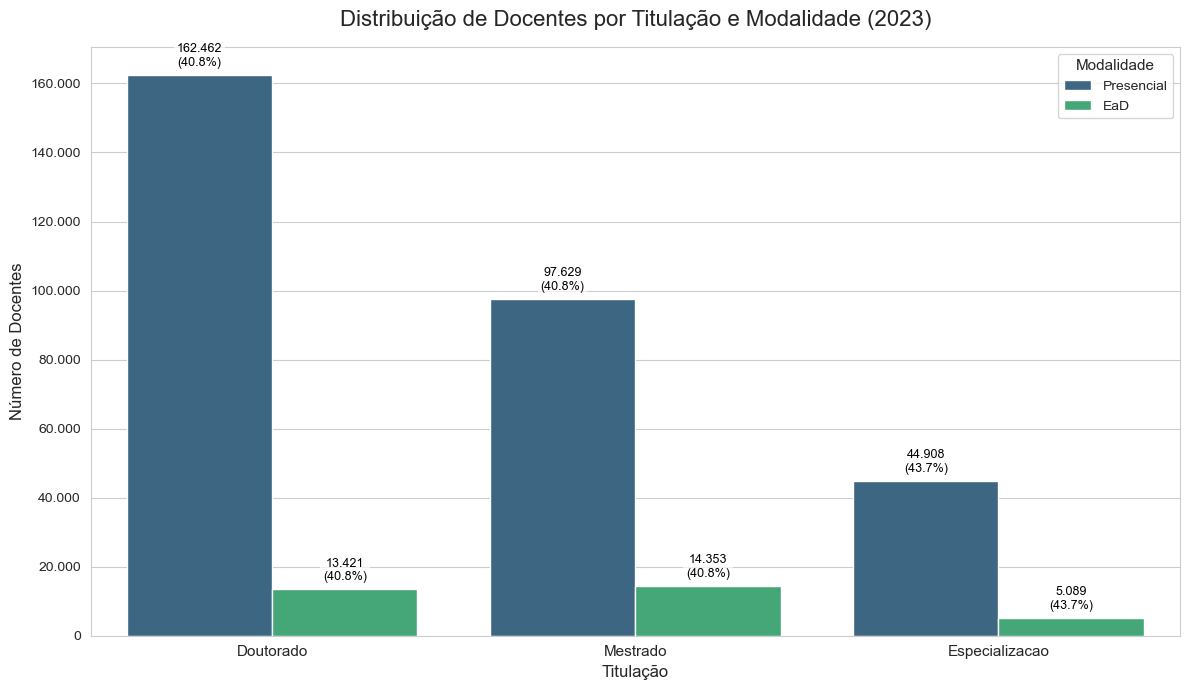

In [35]:
# --- Configuração do lacale para a formatação numérica ---

try:
    locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')
except locale.Error:
    print("Locale 'pt_BR.UTF-8' não encontrado. Tentando 'pt_BR'.")
    try:
        locale.setlocale(locale.LC_NUMERIC, 'pt_BR')
    except locale.Error:
        print("Locale 'pt_BR' também não encontrado. Usando locale padrão do sistema.")
        locale.setlocale(locale.LC_NUMERIC, '') # Fallback
# Aplicando sns.color_pallete()
modalidade_palette = sns.color_palette("viridis", 2)

# Ajuste do tamanho
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

# Crianddo o gráfico de barras agrupadas
ax = sns.barplot(
    x='Titulação',
    y='Numero_Docentes',
    hue='Modalidade', # Agrupa por modalidade
    data=df_plot,
    #palette={'Presencial': '#D55E00', 'EaD': '#6A5ACD'}, # Cores em hexadecimal
    palette='viridis',
    ax=plt.gca() # Garante que estamos usando o eixo atual
)

# Adicionando rótulo de valores absolutos e percentuais nos barras:

for container in ax.containers:
    for patch in container.patches:
        # posição da barra
        x_val = patch.get_x() + patch.get_width() / 2 # Localizando a barra no eixo x e localizando-a centralmente.
        y_val = patch.get_height() # Localizando a altura da barra
        modalidade = patch.get_label() # Obtém o rótulo da legenda (Presencial/EaD) para o grupo de barras

        # Encontrando os dados correspondentes no DataFrame df_plot
        titulacao = df_plot['Titulação'].iloc[container.patches.index(patch)]
        modalidade_label = 'Presencial' if 'Presencial' in container.get_label() else 'EaD' # Ajusta para pegar a modalidade correta

        # Filtra o df_plot para obter o percentual correto para a barra
        data_row = df_plot[(df_plot['Titulação'] == titulacao) & (df_plot['Modalidade'] == modalidade_label)]

        if not data_row.empty:
            percentual = data_row['Percentual_Dentro_Modalidade'].iloc[0]

            abs_val_formatted = f"{int(y_val):n}"
            text_to_display = f"{abs_val_formatted}\n({percentual:.1f}%)"

            ax.text(x_val, y_val + (ax.get_ylim()[1] * 0.01), # pequeno offset vertical
                   text_to_display,
                   ha='center', va='bottom', fontsize=9, color='black',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
            
# Formatando os número do eixo y        
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}".replace(',', '.')))

# Títulos e rotulos

plt.title('Distribuição de Docentes por Titulação e Modalidade (2023)', fontsize=16, pad=15)
plt.xlabel('Titulação', fontsize=12)
plt.ylabel('Número de Docentes', fontsize=12)

# Formatação eixo y principal (número de docentes) com ponto de milhar
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:n}'))
ax.tick_params(axis='y', labelsize=10) # Constrola o tamanho da fonte do eixo y
ax.tick_params(axis='x', labelsize=11)

plt.legend(title='Modalidade', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig('Figura_5_Distribuição_docentes_TitulaçãoxModalidade.png',dpi=300)
plt.show()